## Restaurant Revenue Prediction

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
# Loading dataset
data = pd.read_csv('/content/restaurant_data.csv')
data

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


## Explratory Data Analysis

In [3]:
# checking shape
print(f"No. of rows: {data.shape[0]}")
print(f"No. of columns: {data.shape[1]}")

No. of rows: 8368
No. of columns: 17


In [4]:
# Checking the columns
data.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')

In [5]:
# Stastistical insight on the dataset
data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [6]:
# Getting general info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [7]:
# Unique items for each column
for column in data.columns:
  print(f"{column}: {data[column].nunique()}")

Name: 8368
Location: 3
Cuisine: 6
Rating: 21
Seating Capacity: 61
Average Meal Price: 3966
Marketing Budget: 4396
Social Media Followers: 7799
Chef Experience Years: 19
Number of Reviews: 949
Avg Review Length: 8368
Ambience Score: 91
Service Quality Score: 91
Parking Availability: 2
Weekend Reservations: 89
Weekday Reservations: 89
Revenue: 8368


1. Name columns seems not very useful. Drop Name column.
2. label encode Location, Cuisine,Parking Availability columns.

In [8]:
# Dropping the name column
data = data.drop(["Name", "Marketing Budget"], axis=1)
data

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.0,38,73.98,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,3.2,76,28.11,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,4.7,48,48.29,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,4.4,34,51.55,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,4.9,88,75.98,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Suburban,Indian,3.4,54,34.85,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Rural,Indian,3.7,49,36.88,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Downtown,Italian,4.7,88,46.87,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Rural,American,3.1,31,44.53,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [9]:
# Encoding Location column
loc_encoder = LabelEncoder()
loc_encoder.fit(data['Location'])
data['Location'] = loc_encoder.transform(data['Location'])

# Encoded labels
for original, encoded in zip(loc_encoder.classes_, range(len(loc_encoder.classes_))):
    print(f"{original} -> {encoded}")

Downtown -> 0
Rural -> 1
Suburban -> 2


In [10]:
# Encoding Cuisine column
cuisine_encoder = LabelEncoder()
cuisine_encoder.fit(data['Cuisine'])
data['Cuisine'] = cuisine_encoder.transform(data['Cuisine'])

# Encoded labels
for original, encoded in zip(cuisine_encoder.classes_, range(len(cuisine_encoder.classes_))):
    print(f"{original} -> {encoded}")

American -> 0
French -> 1
Indian -> 2
Italian -> 3
Japanese -> 4
Mexican -> 5


In [11]:
# Encoding Parking Availability column
parking_encoder = LabelEncoder()
parking_encoder.fit(data['Parking Availability'])
data['Parking Availability'] = parking_encoder.transform(data['Parking Availability'])

# Encoded labels
for original, encoded in zip(parking_encoder.classes_, range(len(parking_encoder.classes_))):
    print(f"{original} -> {encoded}")

No -> 0
Yes -> 1


In [12]:
# Lookiing dataset after encoding
data.head()

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,1,4,4.0,38,73.98,23406,13,185,161.924906,1.3,7.0,1,13,4,638945.52
1,0,5,3.2,76,28.11,42741,8,533,148.759717,2.6,3.4,1,48,6,490207.83
2,1,3,4.7,48,48.29,37285,18,853,56.849189,5.3,6.7,0,27,14,541368.62
3,1,3,4.4,34,51.55,15214,13,82,205.433265,4.6,2.8,1,9,17,404556.80
4,0,4,4.9,88,75.98,40171,9,78,241.681584,8.6,2.1,0,37,26,1491046.35


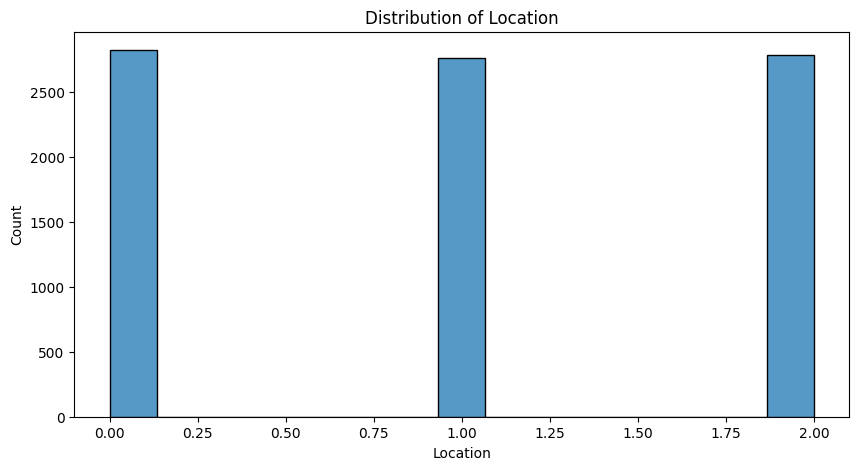

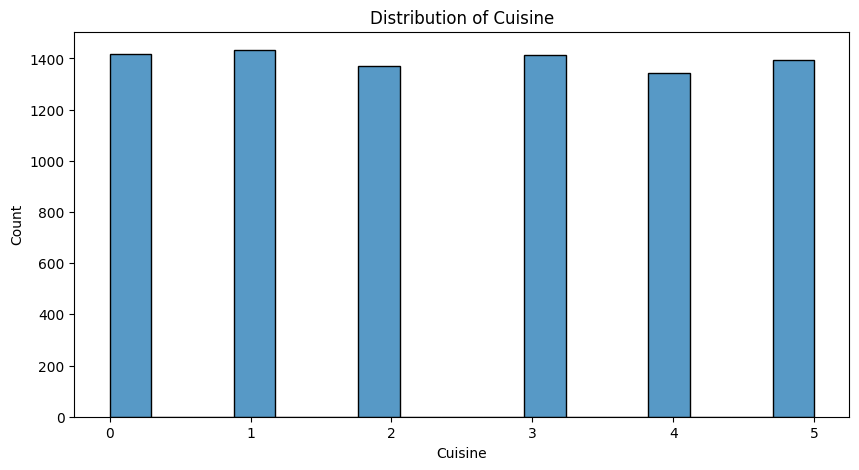

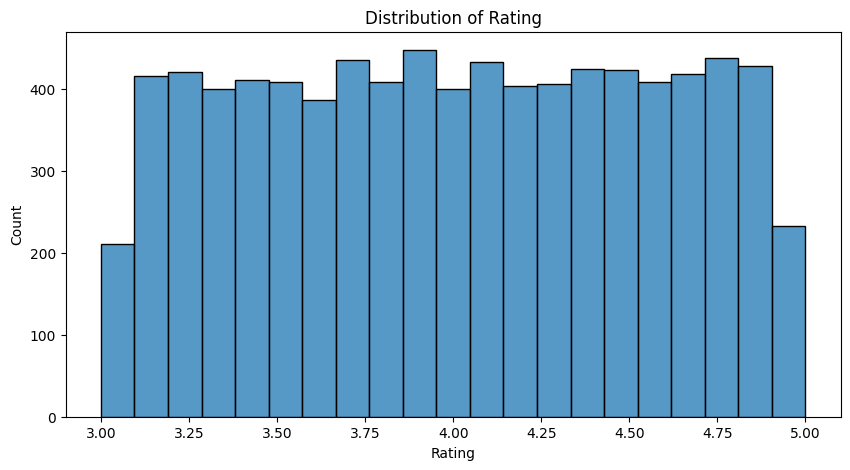

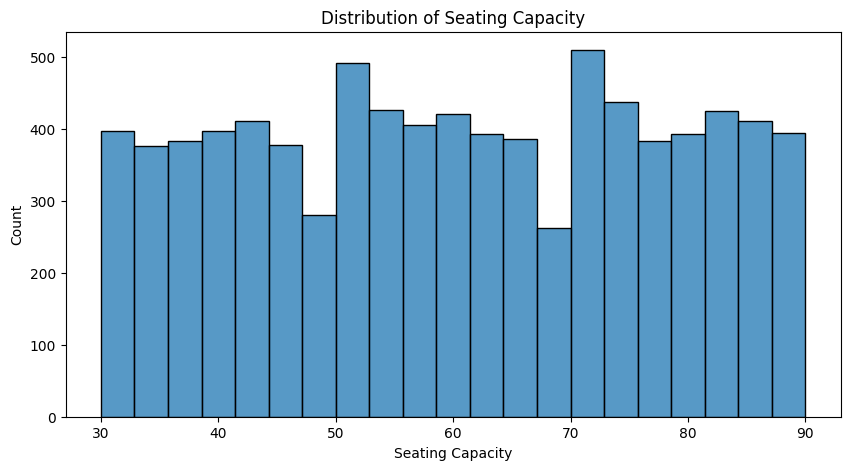

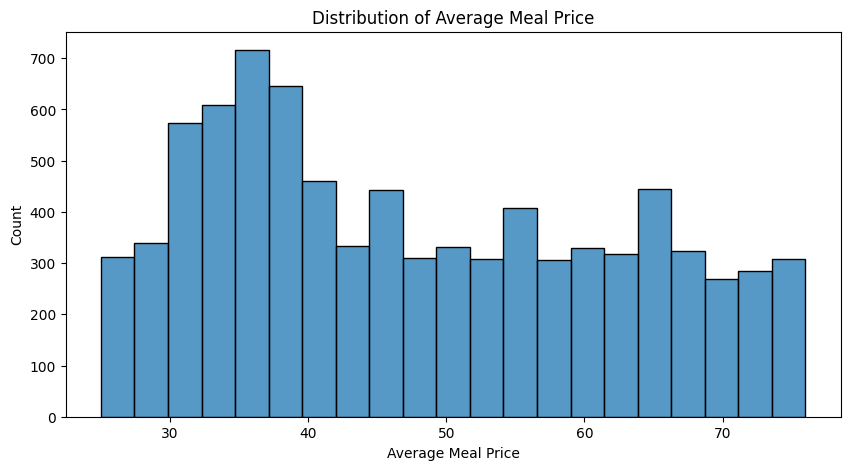

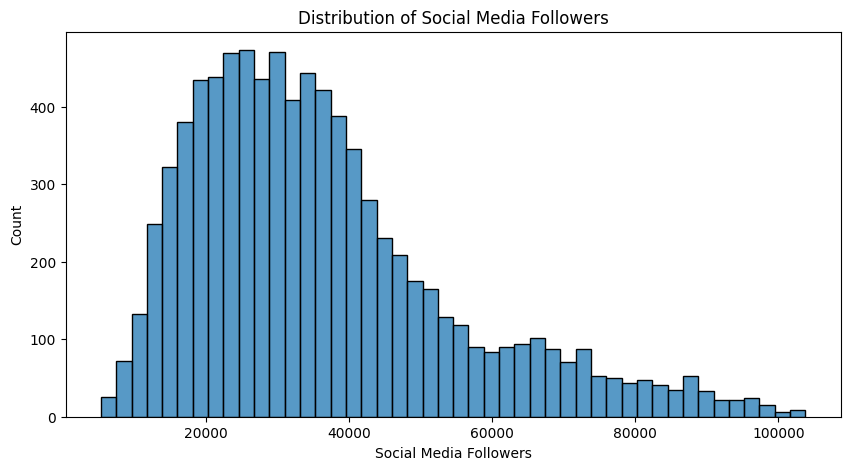

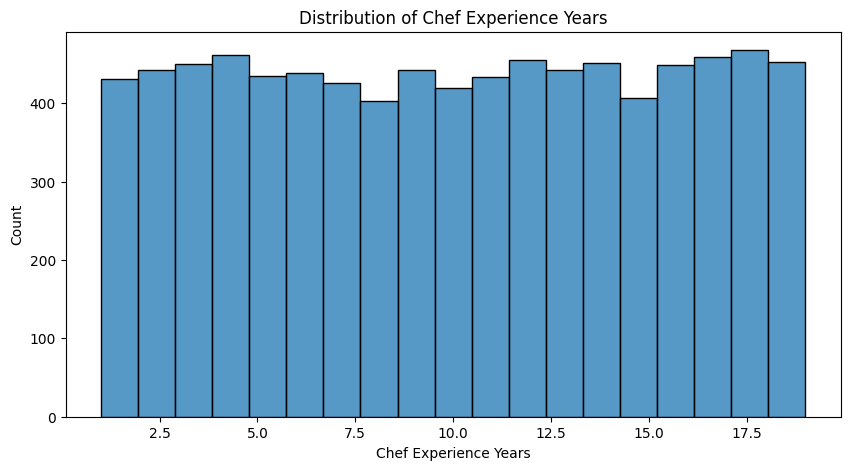

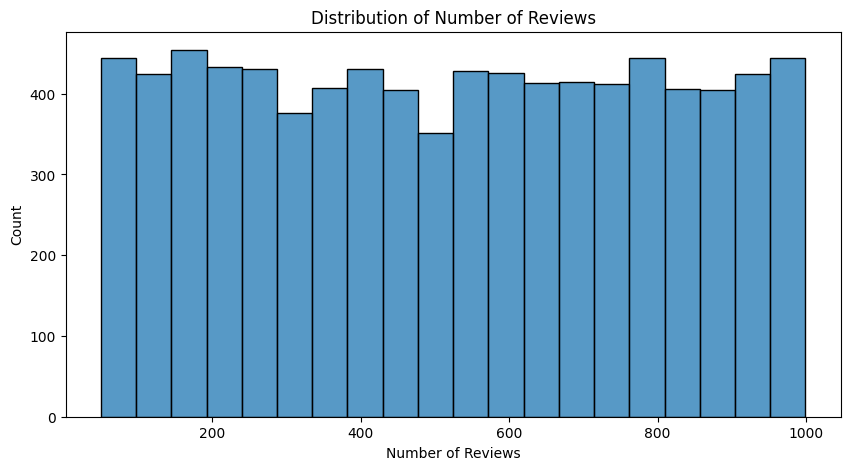

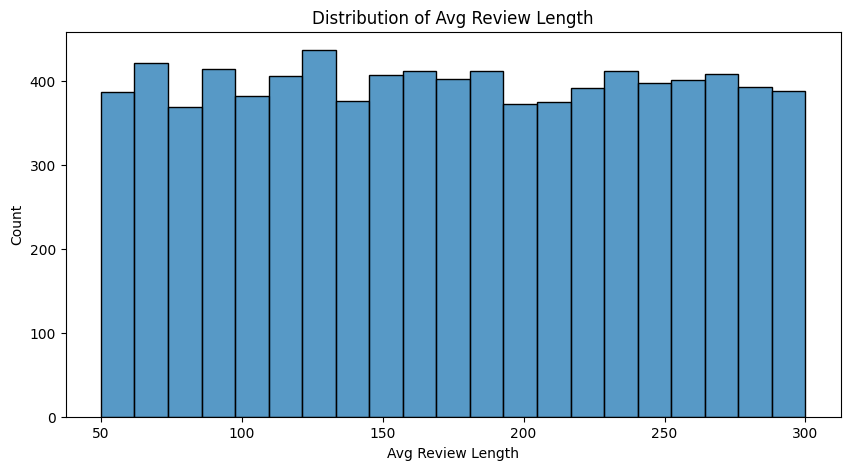

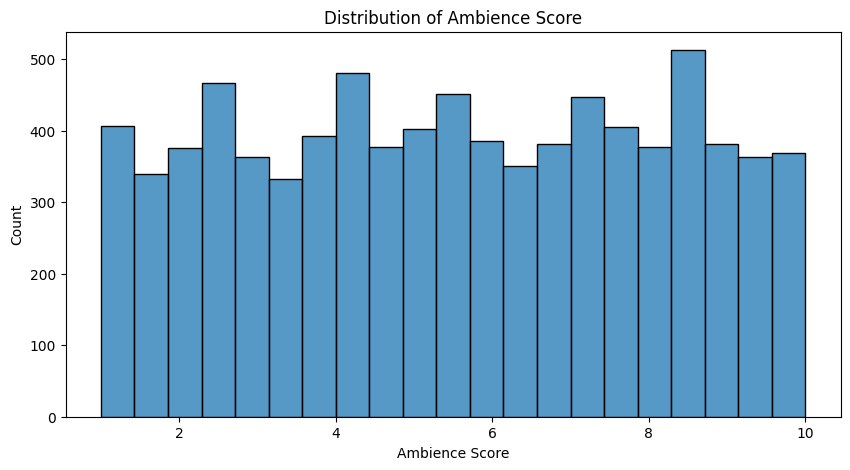

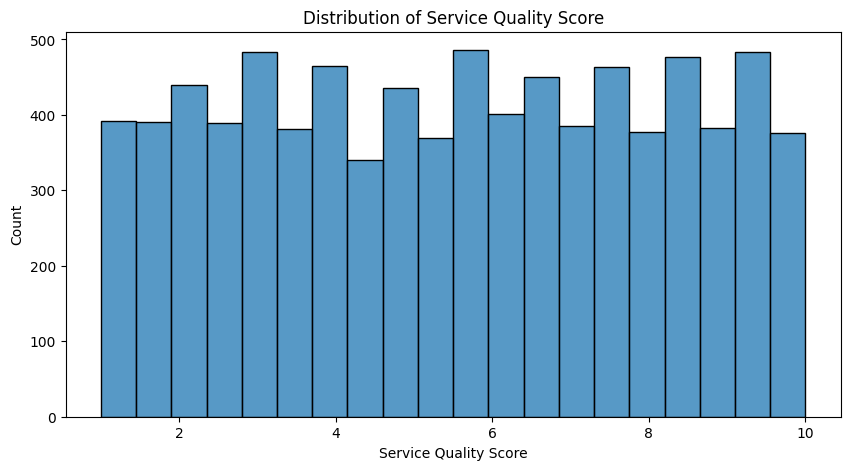

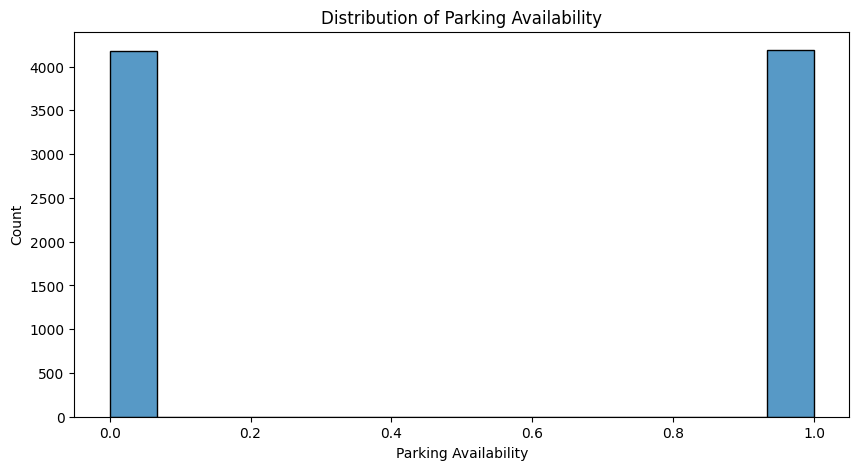

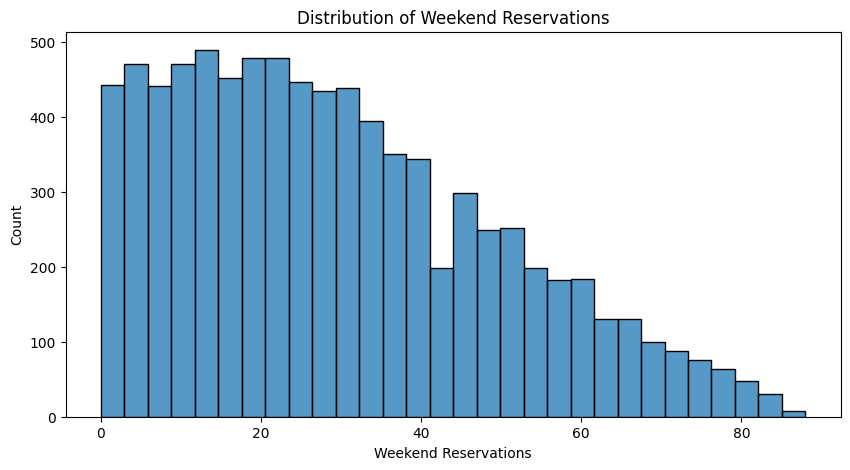

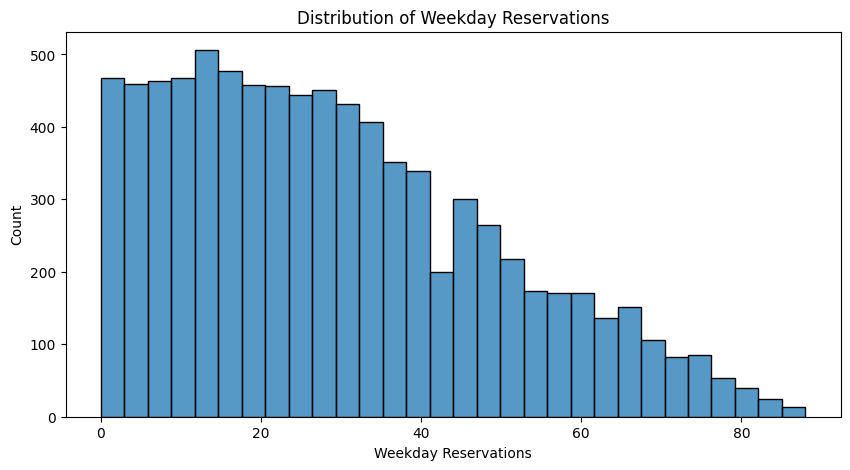

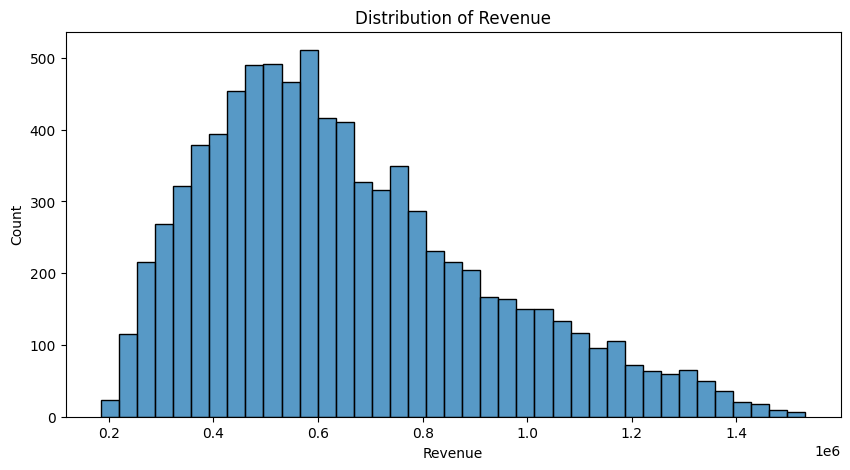

In [13]:
# Distribution of data in each column
for column in data.columns:
  plt.figure(figsize=(10,5))
  plt.title(f"Distribution of {column}")
  sns.histplot(data[column])

<Axes: title={'center': 'Correlation heatmap'}>

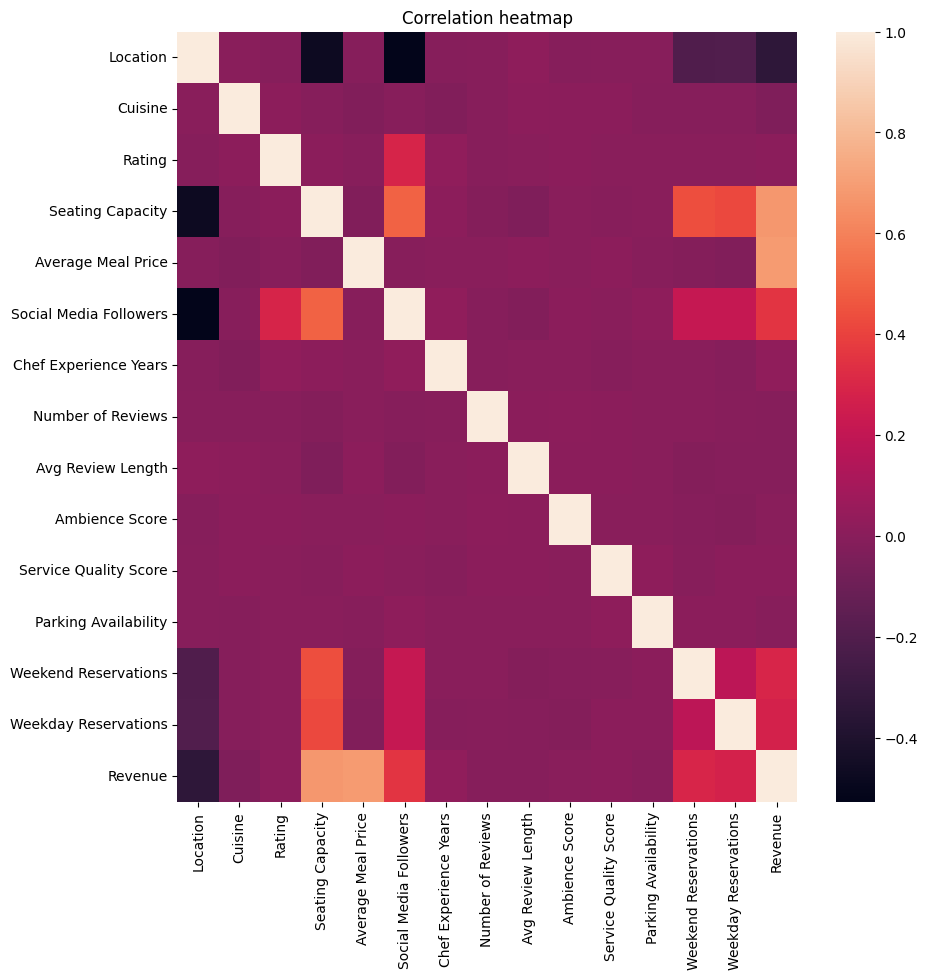

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,10))
plt.title("Correlation heatmap")
sns.heatmap(data.corr())

In [15]:
# Correlation of Output column with others
data.corr()["Revenue"]

,Revenue
Location,-0.337975
Cuisine,-0.032193
Rating,0.009899
Seating Capacity,0.677317
Average Meal Price,0.686365
Social Media Followers,0.354466
Chef Experience Years,0.026899
Number of Reviews,-0.008233
Avg Review Length,-0.011278
Ambience Score,0.003388


### Best correlated with output are columns are:
Seating Capacity, Average Meal Price, Social Media Followers, Weekend Reservations, Weekday Reservations

In [16]:
# Splitting into input and output labels
X = data.drop("Revenue", axis=1)
y = data["Revenue"]

In [17]:
# Checking X
X

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations
0,1,4,4.0,38,73.98,23406,13,185,161.924906,1.3,7.0,1,13,4
1,0,5,3.2,76,28.11,42741,8,533,148.759717,2.6,3.4,1,48,6
2,1,3,4.7,48,48.29,37285,18,853,56.849189,5.3,6.7,0,27,14
3,1,3,4.4,34,51.55,15214,13,82,205.433265,4.6,2.8,1,9,17
4,0,4,4.9,88,75.98,40171,9,78,241.681584,8.6,2.1,0,37,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,2,2,3.4,54,34.85,11298,11,380,253.919515,9.5,5.0,1,37,0
8364,1,2,3.7,49,36.88,20432,9,713,175.590195,2.7,2.6,0,37,21
8365,0,3,4.7,88,46.87,63945,6,436,222.953647,4.8,1.7,1,83,21
8366,1,0,3.1,31,44.53,7170,1,729,178.482851,6.1,2.1,0,6,21


In [18]:
# Checking y
y

,Revenue
0,638945.52
1,490207.83
2,541368.62
3,404556.80
4,1491046.35
...,...
8363,434653.45
8364,414977.92
8365,930395.87
8366,311493.48


In [19]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6694, 14)
X_test shape: (1674, 14)
y_train shape: (6694,)
y_test shape: (1674,)


In [20]:
# Stndardize the unput data

scaler = StandardScaler() # Creating an instance
scaler.fit(X_train)       #Fitting the data
X_train = scaler.transform(X_train) # Transforming training input labels
X_test = scaler.transform(X_test)   # Transforminh test

In [21]:
# Checking training data after scaling
X_train

array([[-1.21227514, -0.86154742, -0.69393123, ..., -1.00779856,
        -0.27795463, -1.36263792],
       [ 1.22355551, -1.446634  , -1.55379863, ..., -1.00779856,
         0.56821537,  0.83245239],
       [-1.21227514,  0.30862574,  0.85383009, ...,  0.99226179,
         2.70852772, -0.96353059],
       ...,
       [-1.21227514, -1.446634  ,  1.02580357, ..., -1.00779856,
         1.61348419,  0.98211764],
       [ 1.22355551,  1.4787989 , -0.17801079, ..., -1.00779856,
        -1.12412463, -0.66420009],
       [-1.21227514,  0.30862574, -0.17801079, ...,  0.99226179,
         1.61348419,  0.38345665]])

In [22]:
# Checking testing data after scaling
X_test

array([[ 1.22355551, -0.27646084, -1.20985167, ...,  0.99226179,
        -0.47705345, -0.46464643],
       [ 0.00564018,  1.4787989 ,  0.50988313, ...,  0.99226179,
        -1.02457522, -0.61431168],
       [ 0.00564018,  0.30862574,  1.541724  , ..., -1.00779856,
        -0.12863051, -0.31498118],
       ...,
       [-1.21227514, -1.446634  , -1.20985167, ...,  0.99226179,
         0.76731419, -1.21297267],
       [-1.21227514,  0.89371232, -1.55379863, ..., -1.00779856,
        -1.27344874, -0.26509276],
       [ 1.22355551,  0.89371232,  0.85383009, ...,  0.99226179,
         0.31934184, -1.46241475]])

## Training ML algorithm

In [23]:
lr_model = LinearRegression()   # Creating an instance
lr_model.fit(X_train, y_train)  # Fitting Training data

LinearRegression()

In [24]:
# Making prediction with test data
y_pred = lr_model.predict(X_test)

In [25]:
# Score of the model
r2score = r2_score(y_test, y_pred)  # r2 score
mse = mean_squared_error(y_test, y_pred) # MSE

# Printing scores
print(f"R2 score: {r2score}")
print(f"MSE: {mse}")

R2 score: 0.955503438879337
MSE: 3189149478.1003532


## Using other models

In [26]:
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
knn_model = KNeighborsRegressor()
svm_model = SVR()
xgb_model = XGBRegressor()

models_list = [dt_model, rf_model, knn_model, svm_model, xgb_model]

In [27]:
for model in models_list:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2score = r2_score(y_test, y_pred)
  print(f"{model} -> R2 score: {r2score}")

DecisionTreeRegressor() -> R2 score: 0.9968499276828872
RandomForestRegressor() -> R2 score: 0.9992302899587595
KNeighborsRegressor() -> R2 score: 0.8983393090017197
SVR() -> R2 score: -0.03333609608051136
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) -> R2 score: 0.9991315394632717


### Making a prediction system

In [28]:
want_to_pred = True

while want_to_pred:
  input_1 = input("Want to predict revenue for  restaurant? (y/n): ").lower()
  if input_1 == "y":
    # Creating an input column for all the fields
    location = input("Enter Location: ").lower() # Getting location

    # Enconding location
    if location == "downtown":
        encoded_loc = 0
    elif location == "rural":
        encoded_loc = 1
    else:
        encoded_loc = 2

    cuisine = input("Enter Cuisine: ").lower() # Getting cuisine

    # Encoding cuisine
    if cuisine == "american":
      encoded_cuisine = 0
    elif cuisine == "french":
      encoded_cuisine = 1
    elif cuisine == "indian":
      encoded_cuisine = 2
    elif cuisine == "itlian":
      encoded_cuisine = 3
    else:
      encoded_cuisine = 5

    rating = float((input("Enter Rating: "))) # Getting rating
    seats = float(input("Enter Seating Capacity: ")) # Getting number of seats
    avg_price = float(input("Enter Average Meal Price: ")) #  Getting average meal price
    soc_med_foll = float(input("Enter number of Social Media Followers: ")) # Getting number of social media followers
    chef_exp = float(input("Enter Chef Experience Years: ")) # Getting Chef experience
    no_of_rev = float(input("Enter Number of Reviews: ")) # Getting number of reviews
    avg_rev_len = float(input("Enter Avg Review Length: ")) # Getting average review length
    am_scr = float(input("Enter Ambience Score: "))         #Getting ambience score
    ser_q_scr = float(input("Enter Service Quality Score: ")) # Getting Service quality score
    parking = input("Enter Parking Availability: ").lower() # Getting parking (y/n)

    #Encoding parking
    if parking == "yes":
      parking_encoded = 1
    else:
      parking_encoded = 0

    weekend_rsvr = float(input("Enter number of Weekend Reservations: ")) # Getting num of reservation on weekends
    weekday_rsvr = float(input("Enter number of Weekday Reservations: ")) # Getting num of reservation on weekdays

    # Collecting data in a list
    input_data_list = [encoded_loc,
                       encoded_cuisine,
                       rating, seats,
                       avg_price,
                       soc_med_foll,
                      chef_exp,
                      no_of_rev,
                       avg_rev_len,
                       am_scr,
                       ser_q_scr,
                       parking_encoded,
                      weekend_rsvr,
                      weekday_rsvr]

    # Cenverting into array and standardizing
    standardized = scaler.transform(np.array(input_data_list).reshape(1,-1))

    # Predicting revenue
    prediction = rf_model.predict(standardized)

    #Printing prediction
    print()
    print()
    print()
    print(f"Estimated revenue: {prediction[0]}")
    input_2 = input("Would you like to predict for another restaurant? (y/n): " )
    if input_2 == "y":
      continue
    else:
      want_to_pred = False
  elif input_1 == "n":
    want_to_pred = False
  else:
    print("Invalid input")

Want to predict revenue for  restaurant? (y/n): n
